In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
applications = pd.read_csv('/content/drive/My Drive/hw_csv/applications(2.0).csv')
industries = pd.read_csv('/content/drive/My Drive/hw_csv/industries(2.0).csv')

In [ ]:
df = pd.DataFrame(applications)
industries = pd.DataFrame(industries)

In [ ]:
# Підрахунок кількості рядків у колонці 'applicant_id'
applicant_count = df['applicant_id'].count()
applicant_count

13315

In [ ]:
#Видалення дублікатів
df = df.drop_duplicates(subset='applicant_id')
applicant_count = df['applicant_id'].count()
applicant_count

13278

In [ ]:
df.dtypes

,0
Applied at,object
Amount,float64
Age,int64
Gender,object
Industry,object
Marital status,object
External Rating,float64
Education level,object
Location,object
applicant_id,object


In [ ]:
#Заповнюємо відсутні значення в External Rating
df['External Rating'] = df['External Rating'].fillna(0)

In [ ]:
# Заповнення пропущених значень в полі 'Education level'
df['Education level'] = df['Education level'].fillna('Середня освіта')


In [ ]:
#Об'єднання з industries.csv
df = pd.merge(left=df, right=industries, on='Industry')

In [ ]:
criterion_1 = ((df['Age'] >= 35) & (df['Age'] <= 55)) * 20

In [ ]:
from datetime import datetime
df['Applied at'] = pd.to_datetime(df['Applied at'], dayfirst=True, errors='coerce')

<ipython-input-100-287d97881a09>:2: UserWarning: Parsing dates in %m.%d.%Y %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Applied at'] = pd.to_datetime(df['Applied at'], dayfirst=True, errors='coerce')


In [ ]:
# Встановлюємо criterion_2 на основі того, чи 'Applied at' менше 5 (понеділок - п'ятниця)
criterion_2 = np.where(df['Applied at'].dt.weekday < 5, 20, 0)


In [ ]:
criterion_3 = np.where(df['Marital status'] == 'Married', 20, 0)

In [ ]:
criterion_4 = np.where(df['Location'] == 'Київ чи область', 10, 0)

In [ ]:
#df['Score'] criterion_5

In [ ]:
#Якщо 'External Rating' більше чи дорівнює 7, до рейтингу додається 20 балів
criterion_6 = np.where(df['External Rating'] >= 7, 20,
              np.where(df['External Rating'] <= 2, -20, 0))


In [ ]:
#Перевірка на відсутні значення 'Amount'
#Перевірка 'External Rating' = 0

df['Rating'] = np.where(df['Amount'].isnull(), 0,
                np.where(df['External Rating'] == 0, 0,

                         #Додавання критеріїв для рейтингу
                        criterion_1 + criterion_2 + criterion_3 + criterion_4 + df['Score'] + criterion_6))

In [ ]:
# Видаляємо рядки, де 'Rating' менше 0
df = df[df['Rating'] >= 0]

In [ ]:
df['Applied at'].notnull().count()

12895

In [ ]:
# Визначаємо початок тижня з обробкою пропущених значень
df['week_start'] = df['Applied at'] - pd.to_timedelta(df['Applied at'].dt.weekday.fillna(0), unit='d')

In [ ]:
#Виймаємо колонки 'week_start', 'Rating'
new_df = df[['week_start', 'Rating']]
new_df

In [ ]:
#Перетворюємо timestamp в date
new_df['week_start'] = new_df['week_start'].dt.date
new_df

In [ ]:
#Групуємо за тижнем
grouped_df = new_df.groupby('week_start').mean()

In [ ]:
grouped_df.columns

Index(['Rating'], dtype='object')

<Axes: xlabel='week_start'>

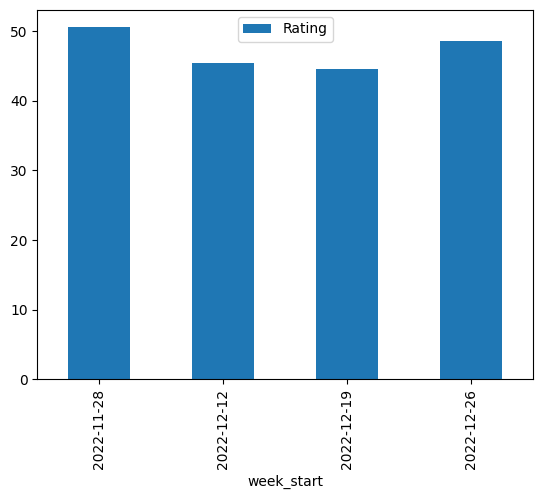

In [ ]:
# Створюємо графік
grouped_df.plot( y='Rating', kind='bar')